## Overview Data

In [47]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
#load dataset
data = pd.read_csv('readyForModeling.csv')
data.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,cuaca
0,24.3,33.2,27.1,90.0,1.9,2.8,4.0,300.0,1.0,4,2
1,24.3,29.8,26.5,91.0,24.3,2.7,3.0,130.0,0.0,8,2
2,24.0,34.0,27.9,86.0,3.4,0.4,3.0,70.0,1.0,8,2
3,24.2,34.2,28.4,82.0,0.0,4.2,3.0,300.0,1.0,8,1
4,24.2,32.2,27.4,88.0,0.0,7.7,4.0,280.0,1.0,8,1


## EDA | Exploratory Data Analysis

Struktur dan karakteristik dari DataFrame Train dan Test

In [49]:
data2 = data.copy()

In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       342 non-null    float64
 1   Tx       342 non-null    float64
 2   Tavg     342 non-null    float64
 3   RH_avg   342 non-null    float64
 4   RR       342 non-null    float64
 5   ss       342 non-null    float64
 6   ff_x     342 non-null    float64
 7   ddd_x    342 non-null    float64
 8   ff_avg   342 non-null    float64
 9   ddd_car  342 non-null    int64  
 10  cuaca    342 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 29.5 KB


In [51]:
data2.isnull().sum()

Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
cuaca      0
dtype: int64

In [52]:
data2.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,cuaca
0,24.3,33.2,27.1,90.0,1.9,2.8,4.0,300.0,1.0,4,2
1,24.3,29.8,26.5,91.0,24.3,2.7,3.0,130.0,0.0,8,2
2,24.0,34.0,27.9,86.0,3.4,0.4,3.0,70.0,1.0,8,2
3,24.2,34.2,28.4,82.0,0.0,4.2,3.0,300.0,1.0,8,1
4,24.2,32.2,27.4,88.0,0.0,7.7,4.0,280.0,1.0,8,1


## Splitting

In [53]:
X = data2.drop('cuaca',axis=1)
y = data2['cuaca']

print(X.shape)
print(y.shape)

(342, 10)
(342,)


In [54]:
X

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,24.3,33.2,27.1,90.0,1.9,2.8,4.0,300.0,1.0,4
1,24.3,29.8,26.5,91.0,24.3,2.7,3.0,130.0,0.0,8
2,24.0,34.0,27.9,86.0,3.4,0.4,3.0,70.0,1.0,8
3,24.2,34.2,28.4,82.0,0.0,4.2,3.0,300.0,1.0,8
4,24.2,32.2,27.4,88.0,0.0,7.7,4.0,280.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...
337,24.7,33.0,27.7,89.0,0.0,8.2,3.0,70.0,1.0,8
338,24.2,32.1,27.1,90.0,21.0,4.5,4.0,330.0,1.0,8
339,24.2,32.5,26.6,90.0,1.3,2.9,5.0,170.0,1.0,8
340,23.6,32.8,26.8,92.0,13.1,3.2,4.0,240.0,1.0,8


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((273, 10), (69, 10), (273,), (69,))

## Training

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [57]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
])

In [58]:
from sklearn.compose import ColumnTransformer

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']),
    ('categoric', categorical_pipeline, ['ddd_car'])
])

## Pipeline

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [61]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])

In [62]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tn', 'Tx', 'Tavg', 'RH_avg',
                                                   'RR', 'ss', 'ff_x', 'ddd_x',
                                                   'ff_avg']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ddd_car'])])),
                ('algo', RandomForestClassifier(random_state=42))])

In [63]:
accuracies_rf = cross_val_score(pipeline, X = X_train, y = y_train, cv = 5)
print("Akurasi rata-rata (5-Fold CV): {:.2f}%".format(accuracies_rf.mean() * 100))

Akurasi rata-rata (5-Fold CV): 97.80%


In [64]:
list_akurasi = list(accuracies_rf * 100)
list_akurasi

[98.18181818181819,
 98.18181818181819,
 96.36363636363636,
 98.14814814814815,
 98.14814814814815]

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

[[ 1  1  0]
 [ 0 25  0]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00        42

    accuracy                           0.99        69
   macro avg       0.99      0.83      0.88        69
weighted avg       0.99      0.99      0.98        69

Akurasi: 0.9855072463768116


In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Akurasi CV (mean):", scores.mean())


Akurasi CV (mean): 0.978047138047138


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'algo__n_estimators': [50, 100],
    'algo__max_depth': [None, 10],
    'algo__min_samples_split': [2, 5]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best params: {'algo__max_depth': 10, 'algo__min_samples_split': 2, 'algo__n_estimators': 50}
Best CV score: 0.9816835016835016


In [69]:
best_model = grid_search.best_estimator_
y_final = best_model.predict(X_test)

print(confusion_matrix(y_test, y_final))
print(classification_report(y_test, y_final))

[[ 1  1  0]
 [ 0 25  0]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00        42

    accuracy                           0.99        69
   macro avg       0.99      0.83      0.88        69
weighted avg       0.99      0.99      0.98        69



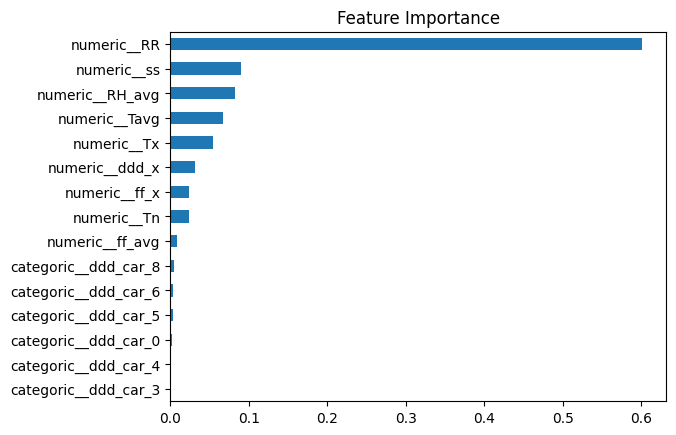

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_model.named_steps['algo'].feature_importances_
feature_names = best_model.named_steps['prep'].get_feature_names_out()
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


## Testing

In [116]:
data2.columns

Index(['JmlNonAktif', 'AmbilCuti', 'TotalTunggakan', 'IPKAkhir', 'SKSLulus',
       'SemesterTerakhir', 'LabelMahasiswa'],
      dtype='object')

In [117]:
testing = {'JmlNonAktif': [8],
           'AmbilCuti': [0],
           'TotalTunggakan': [0],
           'IPKAkhir': [2.98],
           'SKSLulus': [144],
           'SemesterTerakhir': [10]
          }

testing = pd.DataFrame(testing)
testing

,JmlNonAktif,AmbilCuti,TotalTunggakan,IPKAkhir,SKSLulus,SemesterTerakhir
0,8,0,0,2.98,144,10


In [118]:
pred_coba = pipeline.predict(testing)
print('Status Mahasiswa:', pred_coba)

Status Mahasiswa: [1]


## Save Model

In [119]:
import pickle

pickle.dump(pipeline,open('NBC.pkl','wb'))